In [3]:
import numpy as np
import time
import matplotlib.pyplot as plt
import numpy as np
import math

In [30]:
features = 3000
iterations = 100

def step(s):
    return {x: features-min(features, s*x) for x in range(1, iterations) if s*x <= features}

def percentage(p):
    def f(x):
        if x <= 1:
            return 0
        else:
            s = f(x-1)
            return s + p*(features - s)

    return {x: features-min(features, f(x)) for x in range(1, iterations)}

def p2(p):
    def f(x):
        if x <= 1:
            return 0
        else:
            s = f(x-1)
            return s + max(p * abs(1000 - (features - s)), 5)

    return {x: features-min(features, f(x)) for x in range(1, iterations)}

def sqr():
    def f(x):
        if x <= 1:
            return 0
        else:
            s = f(x-1)
            return s + math.sqrt(max(features - s, 0.000001))

    return {x: features-min(features, f(x)) for x in range(1, iterations) if f(x) <= features - 1}

def annealing():
    def f(i):
        if i <= 1:
            return 0
        else:
            s = f(i-1)
            return s + (features - s)*(1/(i*5+1))

    return {x: features-min(features, f(x)) for x in range(1, iterations) if f(x) <= features - 1}


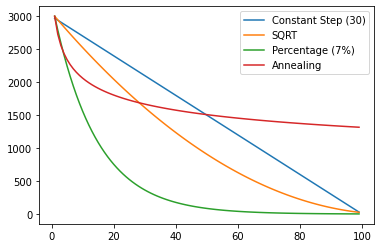

In [5]:
a = step(30)
b1 = percentage(0.07)
c = sqr()
d = annealing()

plt.plot(a.keys(), a.values(), label = "Constant Step (30)")
plt.plot(c.keys(), c.values(), label = "SQRT")
plt.plot(b1.keys(), b1.values(), label = "Percentage (7%)")
plt.plot(d.keys(), d.values(), label = "Annealing")
plt.legend()
plt.show()

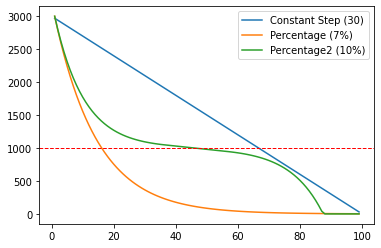

In [31]:
a = step(30)
b1 = percentage(0.07)
b2 = p2(0.1)
c = sqr()
d = annealing()

plt.plot(a.keys(), a.values(), label = "Constant Step (30)")
plt.plot(b1.keys(), b1.values(), label = "Percentage (7%)")
plt.plot(b2.keys(), b2.values(), label = "Percentage2 (10%)")
plt.axhline(1000, color = "red", linewidth=1, linestyle="--")
plt.legend()
plt.show()